In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from time import time

from sklearn.preprocessing import LabelEncoder
from sklearn import ensemble, model_selection, metrics

sns.set_style(style='whitegrid')
warnings.filterwarnings('ignore')

In [6]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

# Data Analysis

In [7]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


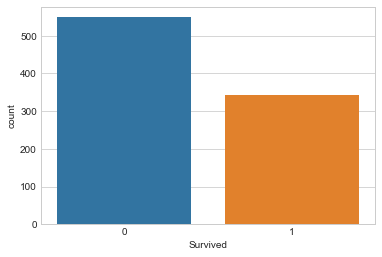

In [14]:
sns.countplot(x = 'Survived' , data=train_data)

plt.show()

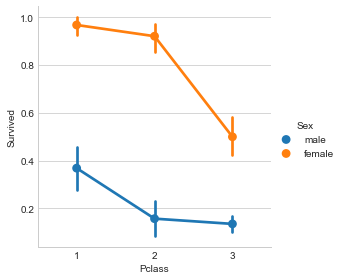

In [15]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train_data)
plt.show()

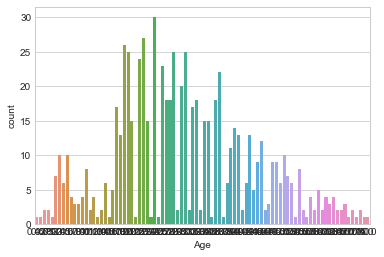

In [16]:
sns.countplot(x = 'Age' , data=train_data)
plt.show()

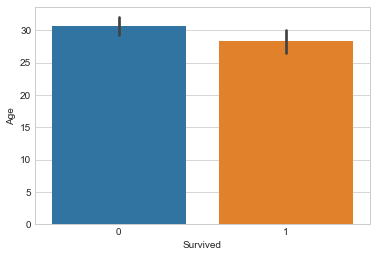

In [17]:
sns.barplot(x= 'Survived', y='Age',  data = train_data)
plt.show()

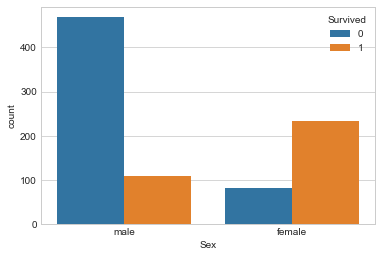

In [18]:
sns.countplot(train_data.Sex, hue = train_data.Survived , data=train_data)

plt.show()

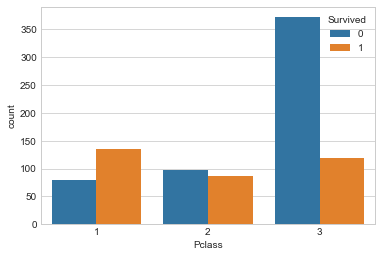

In [19]:
sns.countplot(train_data.Pclass, hue = train_data.Survived , data = train_data )
plt.show()

In [20]:
train_data.groupby(('Pclass','Sex')).apply(lambda x: x.Age.mean())

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
dtype: float64

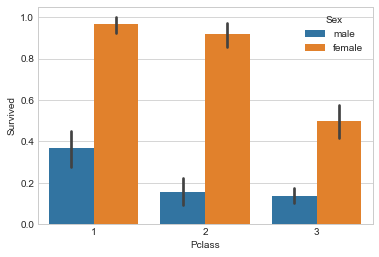

In [21]:
sns.barplot(x= 'Pclass',  y = 'Survived', hue = 'Sex', data = train_data)
plt.show()

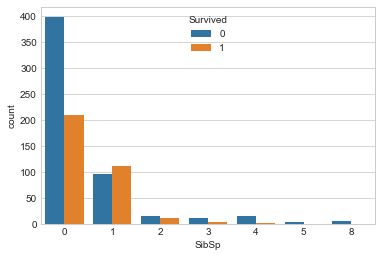

In [22]:
sns.countplot(x = 'SibSp', hue = 'Survived',  data = train_data)
plt.show()

In [23]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


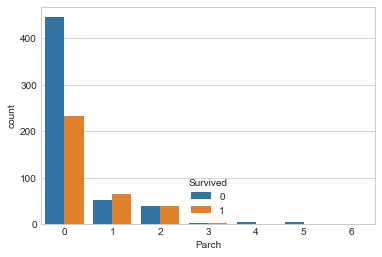

In [24]:
sns.countplot(x = 'Parch', hue = 'Survived',  data = train_data)
plt.show()

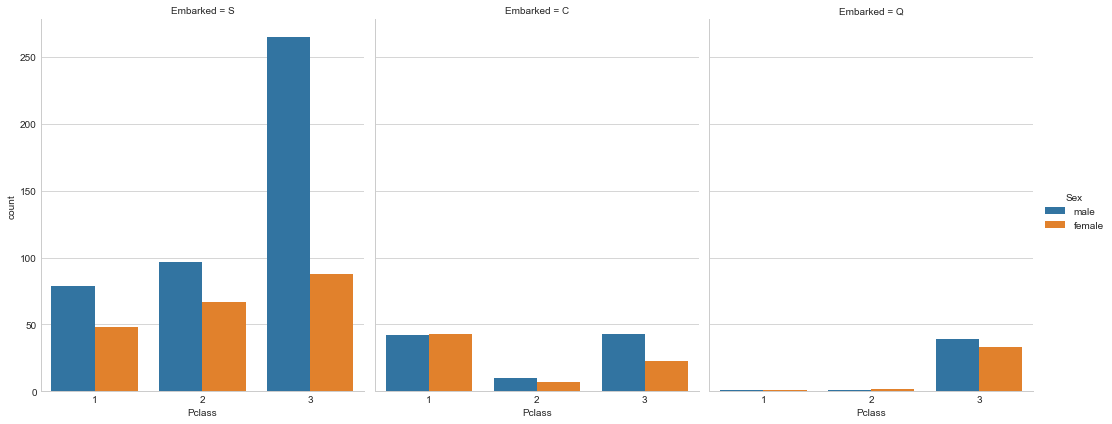

In [25]:
sns.factorplot(x='Pclass', hue='Sex', col='Embarked', data=train_data, kind='count', size=6, aspect=.8)
plt.show()

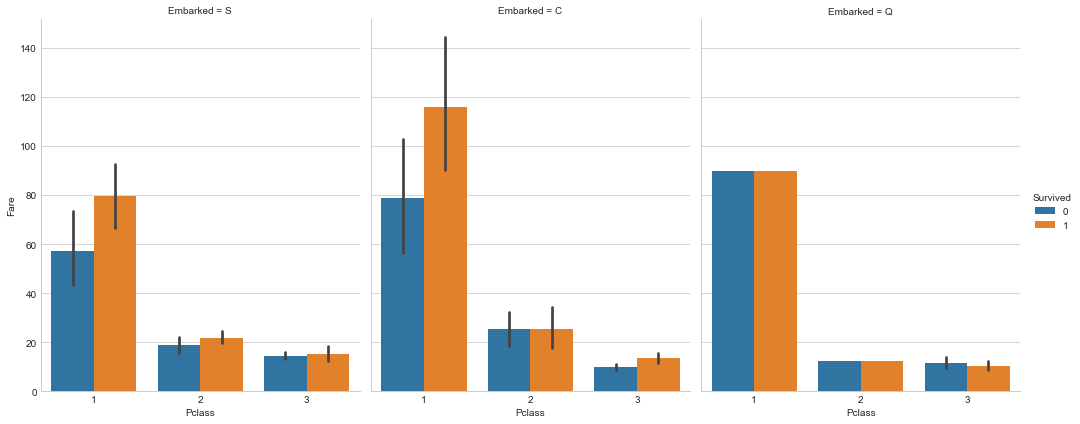

In [26]:
sns.factorplot(x='Pclass', y='Fare', hue='Survived', col='Embarked', data=train_data, kind='bar', size=6, aspect=.8)
plt.show()

In [27]:
full_data = pd.concat([train_data, test_data])

In [28]:
print(train_data.shape)
print(test_data.shape)
print(full_data.shape)

(891, 12)
(418, 11)
(1309, 12)


In [29]:
full_data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

# Handling of Missing Data

In [30]:
Embarked_freq_value = full_data.Embarked.value_counts().index[0]
full_data.Embarked = full_data.Embarked.fillna(Embarked_freq_value)

In [31]:
pclass_of_missing_fare = full_data[full_data.Fare.isnull()].Pclass.values[0]
mean_fare = full_data[full_data.Pclass==pclass_of_missing_fare].Fare.mean()
full_data.Fare = full_data.Fare.fillna(mean_fare)

In [32]:
# Imputing the age values is done according to the category of individual
with_age  = full_data[['Name', 'Age', 'Parch']][~full_data['Age'].isna()]

mean_MrsVal = round(with_age[with_age.Name.str.contains('Mrs.')].Age.mean())
full_data.loc[(full_data['Age'].isna()) & (full_data.Name.str.contains('Mrs.')), 'Age'] = mean_MrsVal

mean_DrVal = round(with_age[with_age.Name.str.contains(', Dr.')].Age.mean())
full_data.loc[(full_data['Age'].isna()) & (full_data.Name.str.contains(', Dr.')), 'Age'] = mean_DrVal

mean_MasterVal = round(with_age[with_age.Name.str.contains('Master.')].Age.mean())
full_data.loc[(full_data['Age'].isna()) & (full_data.Name.str.contains('Master.')), 'Age'] = mean_MasterVal

miss_with_age = with_age[with_age.Name.str.contains('Miss.')]
mean_YMrsVal = round(miss_with_age[miss_with_age.Parch>0].Age.mean())
full_data.loc[(full_data['Age'].isna() & full_data.Name.str.contains('Miss.') & (full_data.Parch>0)), 'Age'] = mean_YMrsVal

mean_OMrsVal = round(miss_with_age[miss_with_age.Parch==0].Age.mean())
full_data.loc[(full_data['Age'].isna() & full_data.Name.str.contains('Miss.') & (full_data.Parch==0)), 'Age'] = mean_OMrsVal

mean_MrVal = round(with_age[with_age.Name.str.contains('Mr.')].Age.mean())
full_data.loc[(full_data['Age'].isna()) & (full_data.Name.str.contains('Mr.')), 'Age'] = mean_MrVal

mean_MsVal = round(with_age[with_age.Name.str.contains('Ms.')].Age.mean())
full_data.loc[(full_data['Age'].isna()) & (full_data.Name.str.contains('Ms.')), 'Age'] = mean_MsVal

In [33]:
full_data.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

# Feature creation

In [34]:
full_data['Family'] = full_data.Parch + full_data.SibSp + 1

In [35]:
labelEnco = LabelEncoder()
full_data['Sex_Enco'] = labelEnco.fit_transform(full_data.Sex)

In [36]:
full_data['Embarked_Enco'] = labelEnco.fit_transform(full_data.Embarked)

In [37]:
full_data['Title'] = full_data.Name.apply(lambda x:x[x.index(', ')+2:x.index('. ')])
full_data['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Sir               1
the Countess      1
Dona              1
Jonkheer          1
Capt              1
Don               1
Mme               1
Lady              1
Name: Title, dtype: int64

In [38]:
full_data['TitleGroup'] = full_data.Title.map({'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Dr':5, 'Rev':6, 'Col':7, 'Major':7, 
                                           'Ms':8, 'Mlle':8, 'Mme':8, 'Lady':8, 'Don':7, 'Sir':7, 'Jonkheer':8, 'Capt':7, 
                                           'Dona':8, 'the Countess':8})

In [39]:
full_data['Family'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family, dtype: int64

In [40]:
full_data['Single'] = full_data.Family.map({1:1,2:0,3:0,4:0,5:0,6:0,7:0,8:0,11:0})

full_data['Couple'] = full_data.Family.map({1:0,2:1,3:0,4:0,5:0,6:0,7:0,8:0,11:0})

full_data['Tripple'] = full_data.Family.map({1:0,2:0,3:1,4:0,5:0,6:0,7:0,8:0,11:0})

full_data['FullFamily'] = full_data.Family.map({1:0,2:0,3:0,4:1,5:0,6:0,7:0,8:0,11:0})

full_data['BigFamily'] = full_data.Family.map({1:0,2:0,3:0,4:0,5:1,6:1,7:1,8:1,11:1})

In [41]:
full_data = full_data.drop(['Cabin', 'Embarked', 'Name', 'Parch', 'SibSp', 'Sex', 'Ticket', 'Title'], axis=1)

In [42]:
train_data = full_data[:891]
test_data = full_data[891:]

In [43]:
ids = test_data['PassengerId']

In [44]:
train_data = train_data.drop(['PassengerId'], axis=1)

In [45]:
test_data = test_data.drop(['Survived', 'PassengerId'], axis=1)

In [46]:
print(train_data.shape)
print(test_data.shape)

(891, 13)
(418, 12)


In [47]:
train_data.isnull().sum()

Age              0
Fare             0
Pclass           0
Survived         0
Family           0
Sex_Enco         0
Embarked_Enco    0
TitleGroup       0
Single           0
Couple           0
Tripple          0
FullFamily       0
BigFamily        0
dtype: int64

In [48]:
test_data.isnull().sum()

Age              0
Fare             0
Pclass           0
Family           0
Sex_Enco         0
Embarked_Enco    0
TitleGroup       0
Single           0
Couple           0
Tripple          0
FullFamily       0
BigFamily        0
dtype: int64

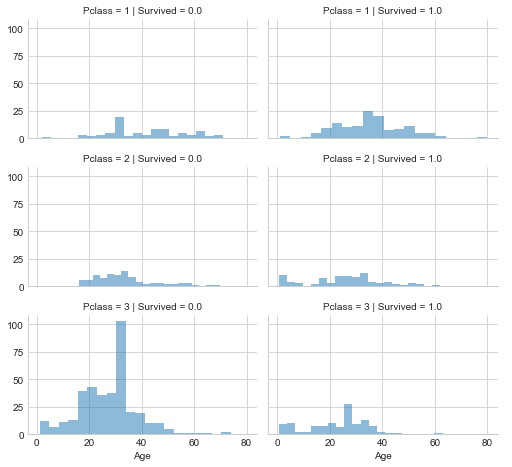

In [49]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

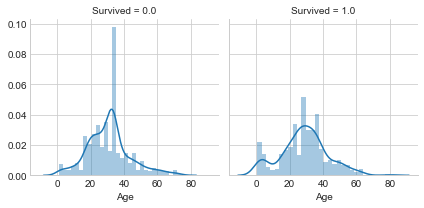

In [50]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(sns.distplot, 'Age', bins=30)
plt.show()

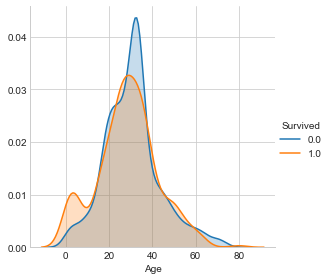

In [51]:
sns.FacetGrid(train_data, hue="Survived", size=4).map(sns.kdeplot, "Age", shade=True).add_legend()
plt.show()

In [52]:
train_data['AgeBand'] = pd.cut(train_data['Age'], [0,7,15,23,37,50,59,80], right=False)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,AgeBand,Survived
0,"[0, 7)",0.686275
5,"[50, 59)",0.434783
4,"[37, 50)",0.427536
3,"[23, 37)",0.356322
2,"[15, 23)",0.346405
1,"[7, 15)",0.325000
6,"[59, 80)",0.222222


In [53]:
def createAgeBandIndex(t_data):
    t_data.loc[(t_data.Age>=0) & (t_data.Age<7), 'AgeBandIndex'] = 0
    t_data.loc[(t_data.Age>=7) & (t_data.Age<15), 'AgeBandIndex'] = 1
    t_data.loc[(t_data.Age>=15) & (t_data.Age<23), 'AgeBandIndex'] = 2
    t_data.loc[(t_data.Age>=23) & (t_data.Age<37), 'AgeBandIndex'] = 3
    t_data.loc[(t_data.Age>=37) & (t_data.Age<50), 'AgeBandIndex'] = 4
    t_data.loc[(t_data.Age>=50) & (t_data.Age<59), 'AgeBandIndex'] = 5
    t_data.loc[(t_data.Age>=59) & (t_data.Age<=80), 'AgeBandIndex'] = 6
    return t_data

In [54]:
train_data = createAgeBandIndex(train_data)
test_data = createAgeBandIndex(test_data)

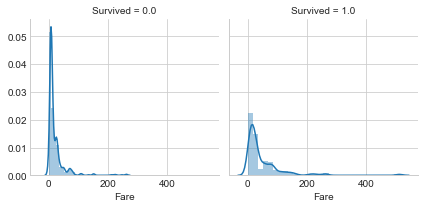

In [55]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(sns.distplot, 'Fare', bins=30)
plt.show()

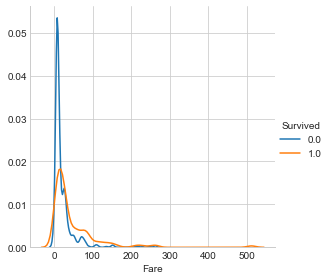

In [56]:
sns.FacetGrid(train_data, hue="Survived", size=4).map(sns.kdeplot, "Fare").add_legend()
plt.show()

In [57]:
train_data['FareBand'] = pd.cut(train_data['Fare'], [0,5,10,40,50,80,100,125,150,280,490,513], right=False)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FareBand,Survived
10,"[490, 513)",1.000000
7,"[125, 150)",0.888889
5,"[80, 100)",0.869565
6,"[100, 125)",0.733333
8,"[150, 280)",0.653846
4,"[50, 80)",0.588235
2,"[10, 40)",0.427441
3,"[40, 50)",0.266667
1,"[5, 10)",0.206250
0,"[0, 5)",0.062500


In [58]:
def createFareBandIndex(f_data):
    f_data.loc[(f_data.Fare>=0) & (f_data.Fare<5), 'FareBandIndex'] = 0
    f_data.loc[(f_data.Fare>=5) & (f_data.Fare<10), 'FareBandIndex'] = 1
    f_data.loc[(f_data.Fare>=10) & (f_data.Fare<40), 'FareBandIndex'] = 2
    f_data.loc[(f_data.Fare>=40) & (f_data.Fare<50), 'FareBandIndex'] = 3
    f_data.loc[(f_data.Fare>=50) & (f_data.Fare<80), 'FareBandIndex'] = 4
    f_data.loc[(f_data.Fare>=80) & (f_data.Fare<100), 'FareBandIndex'] = 5
    f_data.loc[(f_data.Fare>=100) & (f_data.Fare<125), 'FareBandIndex'] = 6
    f_data.loc[(f_data.Fare>=125) & (f_data.Fare<150), 'FareBandIndex'] = 7
    f_data.loc[(f_data.Fare>=150) & (f_data.Fare<280), 'FareBandIndex'] = 8
    f_data.loc[(f_data.Fare>=280) & (f_data.Fare<490), 'FareBandIndex'] = 9
    f_data.loc[(f_data.Fare>=490) & (f_data.Fare<513), 'FareBandIndex'] = 10
    return f_data

In [59]:
train_data = createFareBandIndex(train_data)
test_data = createFareBandIndex(test_data)

In [60]:
train_data = train_data.drop(['Age', 'Fare', 'AgeBand', 'FareBand'], axis=1)

In [61]:
test_data = test_data.drop(['Age', 'Fare'], axis=1)

In [62]:
train_data.head()

,Pclass,Survived,Family,Sex_Enco,Embarked_Enco,TitleGroup,Single,Couple,Tripple,FullFamily,BigFamily,AgeBandIndex,FareBandIndex
0,3,0.0,2,1,2,1,0,1,0,0,0,2.0,1.0
1,1,1.0,2,0,0,3,0,1,0,0,0,4.0,4.0
2,3,1.0,1,0,2,2,1,0,0,0,0,3.0,1.0
3,1,1.0,2,0,2,3,0,1,0,0,0,3.0,4.0
4,3,0.0,1,1,2,1,1,0,0,0,0,3.0,1.0


In [63]:
test_data.head()

,Pclass,Family,Sex_Enco,Embarked_Enco,TitleGroup,Single,Couple,Tripple,FullFamily,BigFamily,AgeBandIndex,FareBandIndex
0,3,1,1,1,1,1,0,0,0,0,3.0,1.0
1,3,2,0,2,3,0,1,0,0,0,4.0,1.0
2,2,1,1,1,1,1,0,0,0,0,6.0,1.0
3,3,1,1,2,1,1,0,0,0,0,3.0,1.0
4,3,3,0,2,3,0,0,1,0,0,2.0,2.0


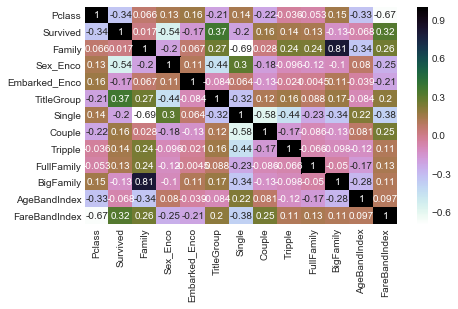

In [64]:
plt.figure(figsize=(7,4)) 
sns.heatmap(train_data.corr(),annot=True,cmap='cubehelix_r')
plt.show()

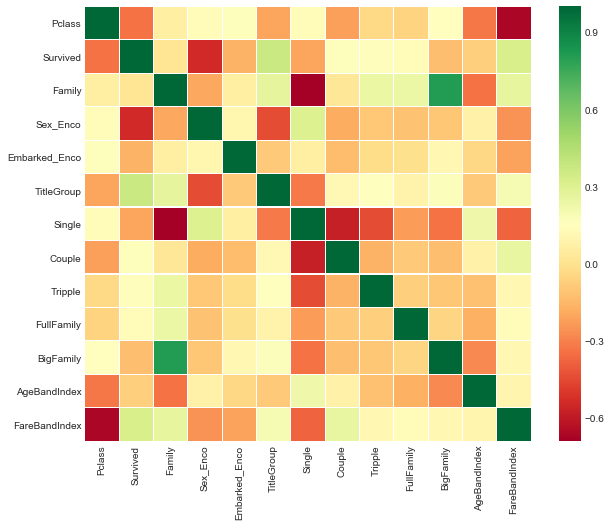

In [70]:
sns.heatmap(train_data.corr(),annot=False,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [975]:
print(train_data.shape)
print(test_data.shape)

(891, 13)
(418, 12)


# Model Creation

In [976]:
train_columns = [col for col in train_data.columns if col!='Survived']

In [977]:
def plotLearningCurve(model, X, y, title=None, cv=None, ylim=None):
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(model, X, y, cv=shuffle )

    tScores_mean = np.mean(train_scores, axis=1)
    tScores_std = np.std(train_scores, axis=1)
    vScores_mean = np.mean(valid_scores, axis=1)
    vScores_std = np.std(valid_scores, axis=1)

    plt.figure()
    plt.fill_between(train_sizes, tScores_mean-tScores_std, tScores_mean+tScores_std, alpha=0.2, color='r')
    plt.fill_between(train_sizes, vScores_mean-vScores_std, vScores_mean+vScores_std, alpha=0.2, color='g')
    plt.plot(train_sizes, tScores_mean, 'o-',color='r', label='Training Score')
    plt.plot(train_sizes, vScores_mean, 'o-',color='g', label='Validation Score')
    
    if title is not None:
        plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    if ylim is not None:
        plt.ylim(ylim)
    plt.show()

In [978]:
gb = ensemble.GradientBoostingClassifier()
shuffle = model_selection.StratifiedShuffleSplit(random_state=42)

In [979]:
cvScore = model_selection.cross_val_score(gb, train_data[train_columns], train_data.Survived, cv=shuffle, n_jobs=-1) 

In [980]:
print('cv score: Mean %f | Std %f | Min %f | Max %f '%(cvScore.mean(), cvScore.std(), cvScore.min(), cvScore.max()))
print('list is %s' %cvScore.ravel())

cv score: Mean 0.798889 | Std 0.033500 | Min 0.744444 | Max 0.844444 
list is [0.78888889 0.75555556 0.74444444 0.84444444 0.81111111 0.78888889
 0.82222222 0.83333333 0.76666667 0.83333333]


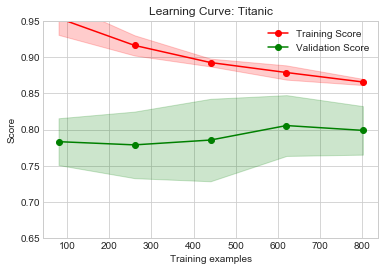

In [981]:
plotLearningCurve(gb, train_data[train_columns], train_data.Survived, cv=shuffle, 
                  ylim=(0.65,0.95), title='Learning Curve: Titanic')

In [997]:
param_grid = {'learning_rate':[0.008,0.009,0.01,0.02],
              'min_samples_split':[7,6,5],
              'max_depth': [5,6,7],
              'n_estimators':[115,120,125]}

In [998]:
t0=time()
gb_gridSearch = model_selection.GridSearchCV(gb, param_grid, cv=shuffle, n_jobs=-1)
gb_gridSearch.fit(X=train_data[train_columns], y=train_data.Survived)

print('execution time: %f'%(time()-t0))
print('best score %0.6f'%gb_gridSearch.best_score_)
print(gb_gridSearch.best_params_) 
for val in gb_gridSearch.grid_scores_:
    print(val)

execution time: 168.138159
best score 0.824444
{'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 120}
mean: 0.81778, std: 0.03624, params: {'learning_rate': 0.008, 'max_depth': 5, 'min_samples_split': 7, 'n_estimators': 115}
mean: 0.81778, std: 0.03624, params: {'learning_rate': 0.008, 'max_depth': 5, 'min_samples_split': 7, 'n_estimators': 120}
mean: 0.82000, std: 0.03213, params: {'learning_rate': 0.008, 'max_depth': 5, 'min_samples_split': 7, 'n_estimators': 125}
mean: 0.82000, std: 0.03843, params: {'learning_rate': 0.008, 'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 115}
mean: 0.82000, std: 0.03843, params: {'learning_rate': 0.008, 'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 120}
mean: 0.82222, std: 0.03443, params: {'learning_rate': 0.008, 'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 125}
mean: 0.82000, std: 0.03843, params: {'learning_rate': 0.008, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 115}
mean: 0

In [996]:
gb_best = gb_gridSearch.best_estimator_

outer_CV_score = model_selection.cross_val_score(gb_best, train_data[train_columns], train_data.Survived, n_jobs=-1, cv=shuffle)
print('outer cv mean value is %f' %outer_CV_score.mean())

outer cv mean value is 0.824444


In [1091]:
gb_best.feature_importances_

array([0.14749709, 0.06441363, 0.02287875, 0.01636389, 0.5827547 ,
       0.00580128, 0.00111002, 0.00416755, 0.00437775, 0.05111514,
       0.04059586, 0.05892434])

In [985]:
gb_best.fit(train_data[train_columns], train_data.Survived)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=6,
              min_weight_fraction_leaf=0.0, n_estimators=120,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

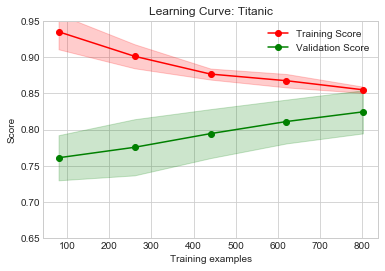

In [986]:
plotLearningCurve(gb_best, train_data[train_columns], train_data.Survived, cv=shuffle, 
                  ylim=(0.65,0.95), title='Learning Curve: Titanic')

In [990]:
test_predictions = gb_best.predict(test_data).astype(int)

In [991]:
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': test_predictions })
output.to_csv('submission.csv', index=False)

In [992]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
